In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [2]:
df = pd.read_csv('Alergian_forest_fires_mine.csv')
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [3]:
df.drop(['day', 'month', 'year'], axis=1, inplace=True)


In [4]:
df['Classes'] = np.where(df['Classes'] == 'not fire', 0,1)


In [5]:
X = df.drop('FWI', axis=1)
y = df['FWI']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((182, 11), (61, 11), (182,), (61,))

In [7]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.657325,-0.357016,-0.365941,0.684556,0.482965,0.349021,0.618172,0.447959,0.512299,0.296033
RH,-0.657325,1.000000,0.262581,0.275592,-0.653649,-0.393893,-0.203883,-0.712353,-0.333027,-0.446906,-0.427696
Ws,-0.357016,0.262581,1.000000,0.204035,-0.226129,-0.010158,0.079699,-0.018845,0.023680,-0.108246,-0.191245
Rain,-0.365941,0.275592,0.204035,1.000000,-0.589465,-0.300364,-0.302591,-0.347660,-0.308258,-0.393221,-0.086938
FFMC,0.684556,-0.653649,-0.226129,-0.589465,1.000000,0.621958,0.528275,0.742079,0.606527,0.773444,0.267099
DMC,0.482965,-0.393893,-0.010158,-0.300364,0.621958,1.000000,0.884417,0.680918,0.984222,0.629505,0.175711
DC,0.349021,-0.203883,0.079699,-0.302591,0.528275,0.884417,1.000000,0.501412,0.951157,0.562431,-0.080660
ISI,0.618172,-0.712353,-0.018845,-0.347660,0.742079,0.680918,0.501412,1.000000,0.632285,0.747764,0.312299
BUI,0.447959,-0.333027,0.023680,-0.308258,0.606527,0.984222,0.951157,0.632285,1.000000,0.624037,0.079373
Classes,0.512299,-0.446906,-0.108246,-0.393221,0.773444,0.629505,0.562431,0.747764,0.624037,1.000000,0.201988


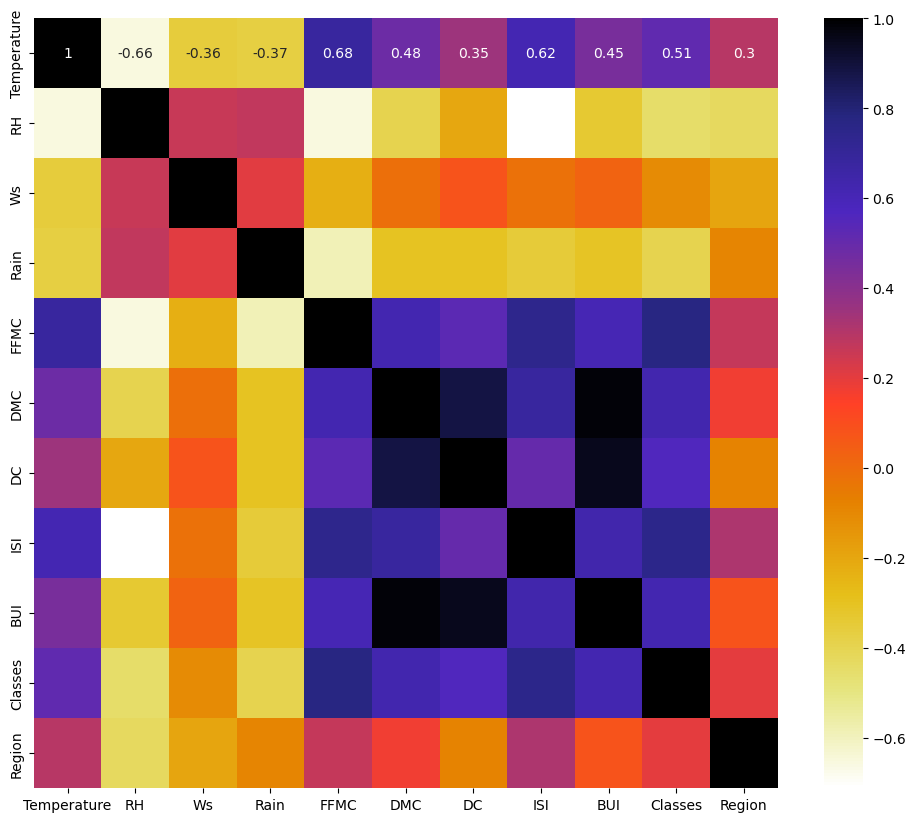

In [8]:
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [9]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [10]:
corr_features = correlation(X_train, 0.75)

In [11]:
corr_features

{'BUI', 'Classes', 'DC'}

In [12]:
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((182, 8), (61, 8))

In [13]:
def scaler_standard(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

In [14]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)


Text(0.5, 1.0, 'X train after scaling')

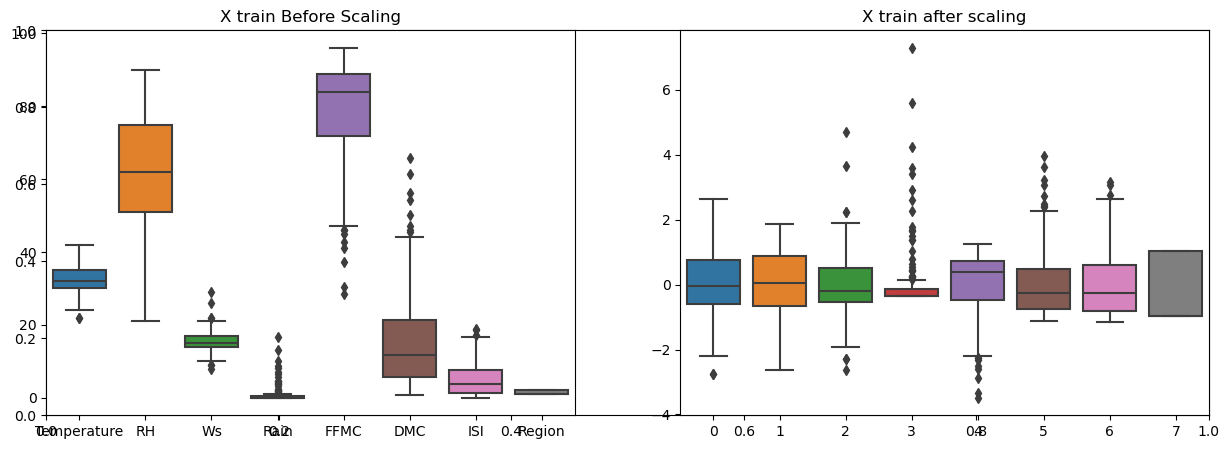

In [15]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X train Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X train after scaling')

# Modeling

## Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

lreg = LinearRegression()
lreg.fit(X_train_scaled, y_train)
lreg_pred = lreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, lreg_pred)
r2 = r2_score(y_test, lreg_pred)

print('Linear Regression')
print('R2 Score Value {:.4f}'.format(r2))
print('MAE value: {:4f}'.format(mae))

Linear Regression
R2 Score Value 0.9700
MAE value: 0.645319


## Lasso Regression

In [17]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
lasso_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, lasso_pred)
r2 = r2_score(y_test, lasso_pred)

print('Lasso Regression')
print('R2 Score Value {:.4f}'.format(r2))
print('MAE value: {:4f}'.format(mae))

Lasso Regression
R2 Score Value 0.9377
MAE value: 1.120918


## Ridge Regression

In [18]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, ridge_pred)
r2 = r2_score(y_test, ridge_pred)

print('Ridge Regression')
print('R2 Score Value {:.4f}'.format(r2))
print('MAE value: {:4f}'.format(mae))


Ridge Regression
R2 Score Value 0.9690
MAE value: 0.664769


## Support Vector Regression

In [19]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score

svr = SVR()
svr.fit(X_train_scaled, y_train)
svr_pred = svr.predict(X_test_scaled)
mae = mean_absolute_error(y_test, svr_pred)
r2 = r2_score(y_test, svr_pred)

print('Support Vector Regression')
print('R2 Score Value {:.4f}'.format(r2))
print('MAE value: {:4f}'.format(mae))

Support Vector Regression
R2 Score Value 0.9340
MAE value: 0.867593


## Random Forest Regressor

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as MAE, r2_score

rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
mae = MAE(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)

print('Random Forrest Regressor')
print('R2 Score Value {:.4f}'.format(r2))
print('MAE value: {:4f}'.format(mae))


Random Forrest Regressor
R2 Score Value 0.9781
MAE value: 0.606246


## K-Neighbors Regressor

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error as MAE, r2_score

knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)
mae = MAE(y_test, knn_pred)
r2 = r2_score(y_test, knn_pred)

print('K-Neighbors Regressor')
print('R2 Score Value {:.4f}'.format(r2))
print('MAE value: {:4f}'.format(mae))



K-Neighbors Regressor
R2 Score Value 0.9422
MAE value: 0.981639


# Tuning

## Tuning Random Forest

In [22]:
param_grid = [{'bootstrap': [True, False], 
               'max_depth':[10,20,30,40,50,60,70,80,90, 100, 110, 120], 
               'min_samples_leaf':[1,3,4], 
               'min_samples_split':[2,6,10], 'n_estimators':[5,20,50,100]}]
f_reg = RandomForestRegressor()
Random_rf = RandomizedSearchCV(f_reg, param_grid, cv=10, verbose=2, n_jobs=-1)
Random_rf.fit(X_train_scaled, y_train)



Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100, 110,
                                                       120],
                                         'min_samples_leaf': [1, 3, 4],
                                         'min_samples_split': [2, 6, 10],
                                         'n_estimators': [5, 20, 50, 100]}],
                   verbose=2)

In [23]:
best_random_grid = Random_rf.best_estimator_
bestrf_pred = best_random_grid.predict(X_test_scaled)

In [24]:
mae = MAE(y_test, bestrf_pred)
r2 = r2_score(y_test, bestrf_pred)
print('Random Forest Tuned')
print('R2 Score Value {:.4f}'.format(r2))
print('MAE value: {:4f}'.format(mae))


Random Forest Tuned
R2 Score Value 0.9771
MAE value: 0.635399


## Tuning Ridge Regression

In [25]:
from sklearn.exceptions import FitFailedWarning, ConvergenceWarning
import warnings
warnings.filterwarnings(action='ignore')
ridge_params = [{'alpha': (np.logspace(-11,11,100)),
                 'solver':['auto', 'svd', 'cholesky','lsqr','sparse_cg','sag','saga','lbfgs']}]
ridge = Ridge()
random_ridge = RandomizedSearchCV(ridge, ridge_params, cv=10, n_jobs=-1)
random_ridge.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
                   param_distributions=[{'alpha': array([1.00000000e-11, 1.66810054e-11, 2.78255940e-11, 4.64158883e-11,
       7.74263683e-11, 1.29154967e-10, 2.15443469e-10, 3.59381366e-10,
       5.99484250e-10, 1.00000000e-09, 1.66810054e-09, 2.78255940e-09,
       4.64158883e-09, 7.74263683e-09, 1.29154967e-08, 2.15443469e-08,
       3.59381366e-08, 5.994...
       5.99484250e+06, 1.00000000e+07, 1.66810054e+07, 2.78255940e+07,
       4.64158883e+07, 7.74263683e+07, 1.29154967e+08, 2.15443469e+08,
       3.59381366e+08, 5.99484250e+08, 1.00000000e+09, 1.66810054e+09,
       2.78255940e+09, 4.64158883e+09, 7.74263683e+09, 1.29154967e+10,
       2.15443469e+10, 3.59381366e+10, 5.99484250e+10, 1.00000000e+11]),
                                         'solver': ['auto', 'svd', 'cholesky',
                                                    'lsqr', 'sparse_cg', 'sag',
                                                    'saga', 'lbfgs']}])

In [26]:
best_ridge = random_ridge.best_estimator_
rbest_pred = best_ridge.predict(X_test_scaled)
mae = MAE(y_test, rbest_pred)
r2 = r2_score(y_test, rbest_pred)

print('Ridge Tuned')
print('R2 Score Value {:.4f}'.format(r2))
print('MAE value: {:4f}'.format(mae))


Ridge Tuned
R2 Score Value 0.9700
MAE value: 0.645370


### Feature Removal (Optional)

In [27]:
feature_importances = Random_rf.best_estimator_.feature_importances_
importance_df = pd.DataFrame({'feature': X_train.columns, 'importance':feature_importances}).sort_values('importance', ascending=False)
importance_df


,feature,importance
6,ISI,0.717350
5,DMC,0.157956
4,FFMC,0.117785
2,Ws,0.003026
1,RH,0.002921
0,Temperature,0.000773
7,Region,0.000146
3,Rain,0.000042


Text(0, 0.5, 'Features')

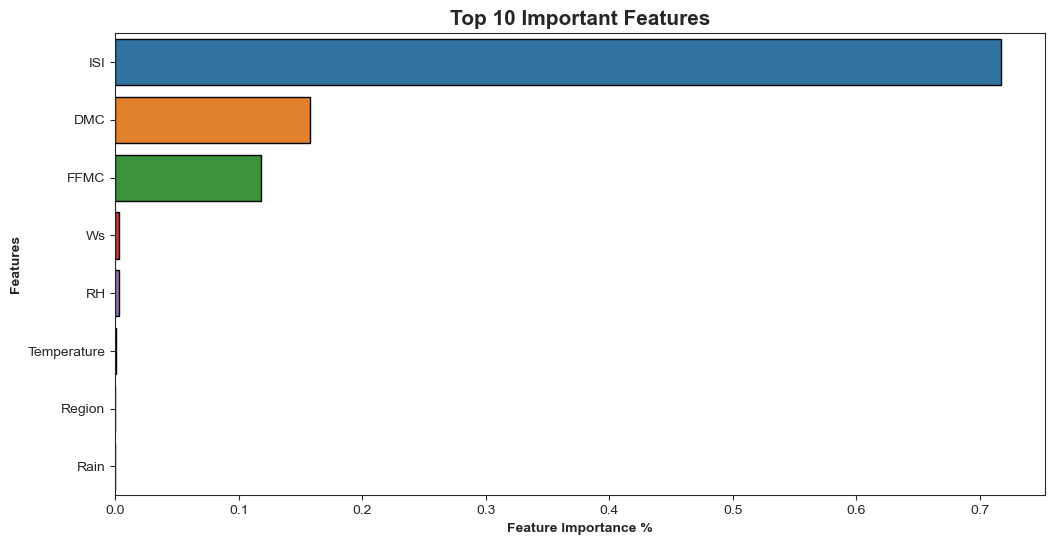

In [28]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.barplot(data=importance_df, x='importance', y='feature', ec='black')
ax.set_title('Top 10 Important Features', weight='bold', fontsize=15)
ax.set_xlabel('Feature Importance %', weight='bold')
ax.set_ylabel('Features', weight='bold')

## Model for Deployment 

In [29]:
Xtrain_new = X_train.drop(['Rain', 'Region', 'RH'], axis=1)
Xtest_new = X_test.drop(['Rain', 'Region', 'RH'],axis=1)


In [30]:
Xtrain_new.columns

Index(['Temperature', 'Ws', 'FFMC', 'DMC', 'ISI'], dtype='object')

In [31]:
Xtrain_new_scaled, Xtest_new_scaled = scaler_standard(Xtrain_new, Xtest_new)

In [32]:
best_random_grid.fit(Xtrain_new_scaled, y_train)
bestrf_pred = best_random_grid.predict(Xtest_new_scaled)
mae = MAE(y_test, bestrf_pred)
r2 = r2_score(y_test, bestrf_pred)

print('Random Forest Tuned + Refined Data')
print('R2 Score Value {:.4f}'.format(r2))
print('MAE value: {:4f}'.format(mae))


Random Forest Tuned + Refined Data
R2 Score Value 0.9717
MAE value: 0.679606


# Classification

In [33]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [35]:
X = df.drop('Classes', axis=1)
y = df['Classes']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=36)
X_train.shape, X_test.shape

((170, 11), (73, 11))

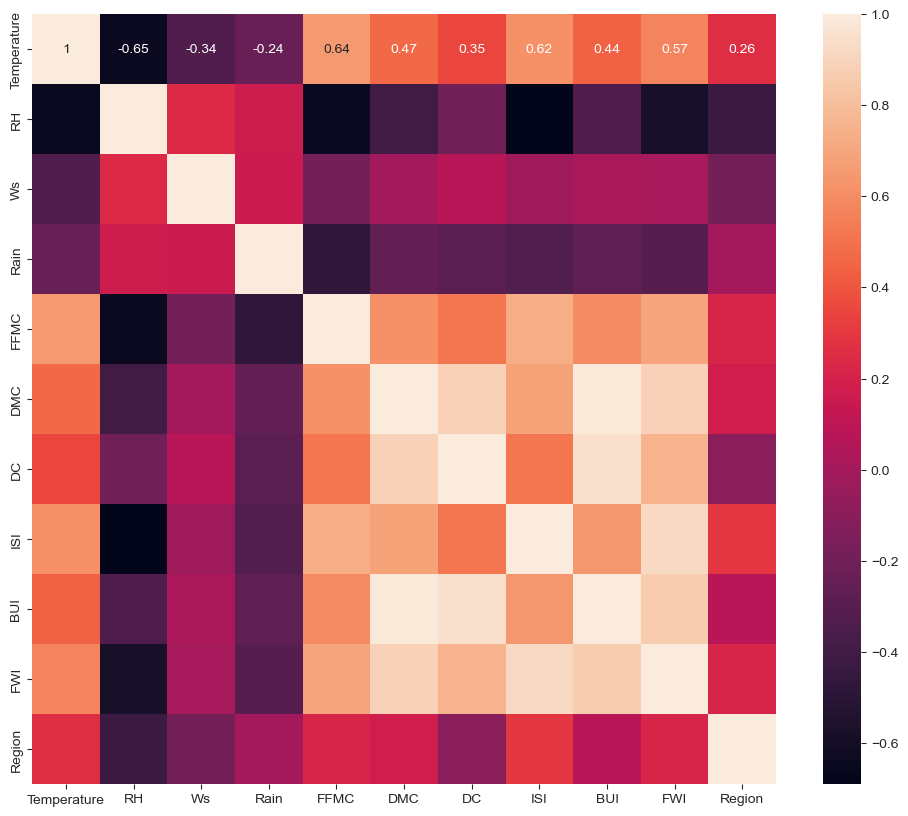

In [37]:
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True)
plt.show()


In [38]:
corr_features = correlation(X_train, 0.75)
corr_features

{'BUI', 'DC', 'FWI'}

In [39]:
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((170, 8), (73, 8))

In [40]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

## Logistic Regression

In [41]:
loreg = LogisticRegression(max_iter=200)
loreg.fit(X_train_scaled, y_train)
loreg_pred = loreg.predict(X_test_scaled)
score = accuracy_score(y_test, loreg_pred)
cr = classification_report(y_test, loreg_pred)

print("Logistic Regression")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Logistic Regression
Accuracy Score value: 0.9589
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        25
           1       0.98      0.96      0.97        48

    accuracy                           0.96        73
   macro avg       0.95      0.96      0.95        73
weighted avg       0.96      0.96      0.96        73



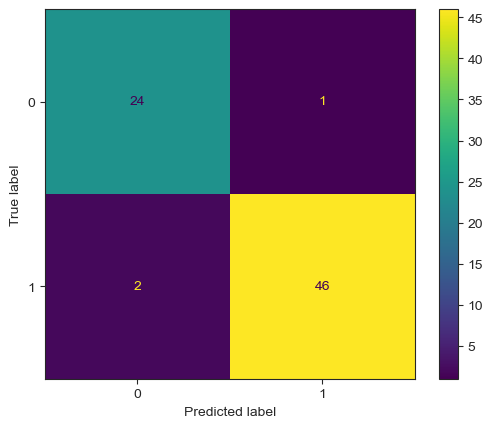

In [42]:
loreg_cm = ConfusionMatrixDisplay.from_estimator(loreg, X_test_scaled, y_test)

## Decision Tree

In [43]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)
dtc_pred = dtc.predict(X_test_scaled)
score = accuracy_score(y_test, dtc_pred)
cr = classification_report(y_test, dtc_pred)
print("Decision Tree Classifier")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Decision Tree Classifier
Accuracy Score value: 0.9726
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.96      0.98        48

    accuracy                           0.97        73
   macro avg       0.96      0.98      0.97        73
weighted avg       0.97      0.97      0.97        73



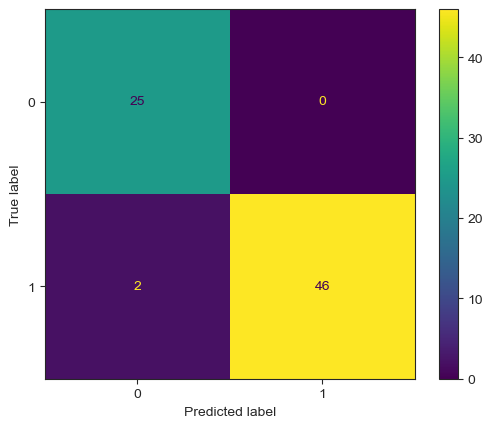

In [44]:
dt_cm = ConfusionMatrixDisplay.from_estimator(dtc, X_test_scaled, y_test)

## Random Forest

In [45]:
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)
rfc_pred = rfc.predict(X_test_scaled)
score = accuracy_score(y_test, rfc_pred)
cr = classification_report(y_test, rfc_pred)
print("Random Forest")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Random Forest
Accuracy Score value: 0.9589
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        25
           1       1.00      0.94      0.97        48

    accuracy                           0.96        73
   macro avg       0.95      0.97      0.96        73
weighted avg       0.96      0.96      0.96        73



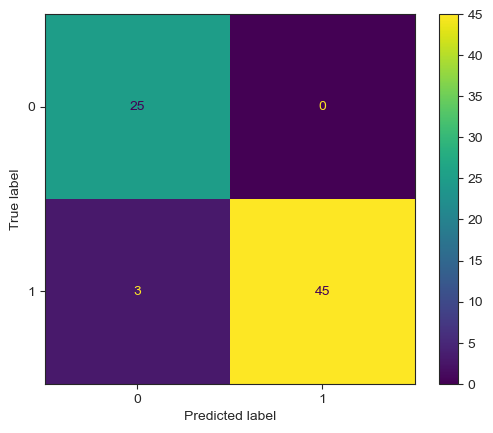

In [46]:
rf_cm = ConfusionMatrixDisplay.from_estimator(rfc, X_test_scaled, y_test)

### Defining my own function

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
def evaluate_classifier(X_train, y_train, X_test, y_test, classifier=None, classifier_name="Classifier"):
    """
    Trains a classifier, evaluates it, and prints the accuracy, classification report, and confusion matrix.
    Parameters:
    - X_train: Training feature set.
    - y_train: Training target labels.
    - X_test: Test feature set.
    - y_test: Test target labels.
    - classifier: The classifier object (default is RandomForestClassifier).
    - classifier_name: Name of the classifier for display purposes.
    """
    # Use RandomForestClassifier as default if no classifier is provided
    if classifier is None:
        classifier = RandomForestClassifier()

    # Train the classifier
    classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Generate classification report
    clf_report = classification_report(y_test, y_pred)

    # Print results
    print(f"{classifier_name} Results:")
    print(f"Accuracy Score: {accuracy:.4f}")
    print("Classification Report:")
    print(clf_report)

    # Plot confusion matrix
    ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test)
    plt.title(f"Confusion Matrix for {classifier_name}")
    plt.show()

# Example usage:
# evaluate_classifier(X_train_scaled, y_train, X_test_scaled, y_test, classifier_name="Random Forest")

RandomForestClassifier Results:
Accuracy Score: 0.9589
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        25
           1       1.00      0.94      0.97        48

    accuracy                           0.96        73
   macro avg       0.95      0.97      0.96        73
weighted avg       0.96      0.96      0.96        73



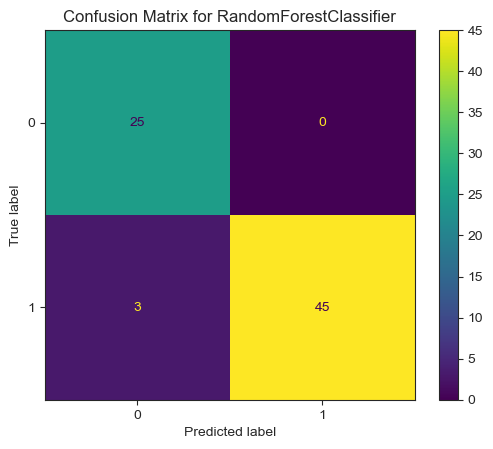

In [48]:
rf_func = RandomForestClassifier()
evaluate_classifier(X_train_scaled, y_train, X_test_scaled, y_test, classifier=rf_func, classifier_name = 'RandomForestClassifier')

## K-Neighbors Classifier

KNeighborsClassifier Results:
Accuracy Score: 0.9452
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92        25
           1       0.94      0.98      0.96        48

    accuracy                           0.95        73
   macro avg       0.95      0.93      0.94        73
weighted avg       0.95      0.95      0.94        73



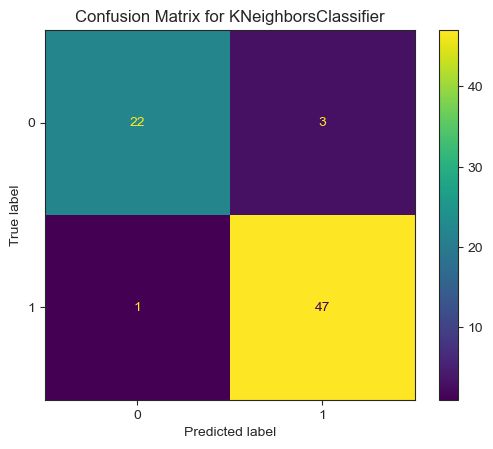

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
evaluate_classifier(X_train_scaled, y_train, X_test_scaled, y_test, classifier=knn,  classifier_name='KNeighborsClassifier')

XGBClassifier Results:
Accuracy Score: 0.9726
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.96      0.98        48

    accuracy                           0.97        73
   macro avg       0.96      0.98      0.97        73
weighted avg       0.97      0.97      0.97        73



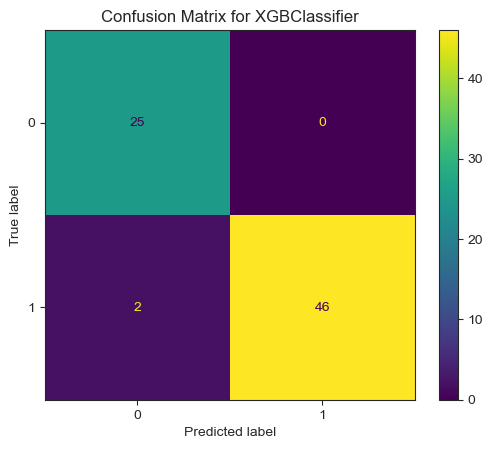

In [50]:
xgb = XGBClassifier()
evaluate_classifier(X_train_scaled, y_train, X_test_scaled, y_test, classifier=xgb ,classifier_name='XGBClassifier')

In [74]:
# Import KNeighborsClassifier to Train from SKlearn
xgb = XGBClassifier()
xgb.fit(X_train_scaled,y_train)
xgb_pred = xgb.predict(X_test_scaled)
score = accuracy_score(y_test, xgb_pred)
cr = classification_report(y_test, xgb_pred)

print("XGboost Classifier")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

XGboost Classifier
Accuracy Score value: 0.9726
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.96      0.98        48

    accuracy                           0.97        73
   macro avg       0.96      0.98      0.97        73
weighted avg       0.97      0.97      0.97        73



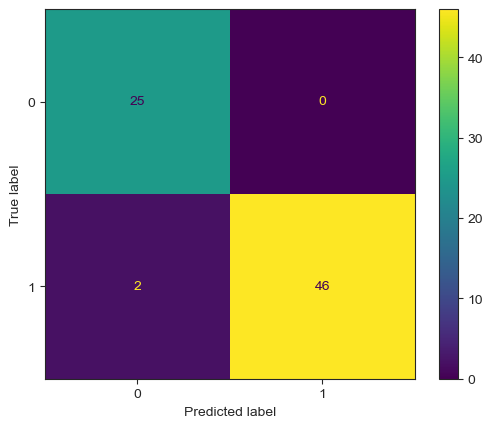

In [75]:
xgb_cm = ConfusionMatrixDisplay.from_estimator(xgb, X_test_scaled, y_test)

## Tuning Classification Models

### Tuning XGboost

params = {
    'learning_rate' : (np.linspace(0,10,100)),
    'max_depth' : np.linspace(1,50,25, dtype=int),
    'min_child_weight' : [1,3,5,7],
    'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.7]}
Random_xgb = RandomizedSearchCV(xgb, params, cv=10, n_jobs=-1)
Random_xgb.fit(X_train_scaled, y_train).best_estimator_

best_xgb = Random_xgb.best_estimator_
best_xgb.score(X_test_scaled, y_test)
bestxgb_pred = best_xgb.predict(X_test_scaled)
cr = classification_report(y_test, bestxgb_pred)
print('Final XGB')
print('Accuracy Score value: {:4f}'.format(score))
print(cr)

In [76]:
params={
 "learning_rate"    : (np.linspace(0,10, 100)) ,
 "max_depth"        : (np.linspace(1,50, 25,dtype=int)),
 "min_child_weight" : [1, 3, 5, 7],
 "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
 "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7]}
Random_xgb = RandomizedSearchCV(xgb, params, cv = 10,n_jobs = -1)
Random_xgb.fit(X_train_scaled, y_train).best_estimator_
best_xgb = Random_xgb.best_estimator_
best_xgb.score(X_test_scaled,y_test)
bestxgb_pred = best_xgb.predict(X_test_scaled)
cr = classification_report(y_test,bestxgb_pred)
print("FINAL XGB")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL XGB
Accuracy Score value: 0.9726
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        25
           1       1.00      0.94      0.97        48

    accuracy                           0.96        73
   macro avg       0.95      0.97      0.96        73
weighted avg       0.96      0.96      0.96        73



### Tuning Random Forest Classifier

In [53]:
params = {'n_estimators' : [90,100,115,130],
          'criterion': ['gini', 'entropy'],
          'max_depth': range(2,20,1),
          'min_samples_leaf' : range(1,10,1),
          'min_samples_split': range(2,10,1),
          'max_features': ['auto', 'log2']}
random_rf = RandomizedSearchCV(rfc, params, cv=10, n_jobs=-1)
random_rf.fit(X_train_scaled, y_train).best_estimator_


RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       min_samples_leaf=6, min_samples_split=4,
                       n_estimators=115)

In [54]:
best_rf = random_rf.best_estimator_
best_rf.score(X_test_scaled, y_test)
bestrf_pred = best_rf.predict(X_test_scaled)
cr = classification_report(y_test, bestrf_pred)
print('Final Random Forest')
print('Accuracy Score value: {:4f}'.format(score))
print(cr)

Final Random Forest
Accuracy Score value: 0.958904
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        25
           1       1.00      0.94      0.97        48

    accuracy                           0.96        73
   macro avg       0.95      0.97      0.96        73
weighted avg       0.96      0.96      0.96        73



### CV Scores

In [57]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=36)


In [83]:
cv_xgb = cross_val_score(best_xgb, X, y, cv=skfold, scoring='accuracy').mean()
print('CV Score XBG Tuned {:4f}'.format(cv_xgb))

CV Score XBG Tuned 0.979333


In [67]:
cv_rf = cross_val_score(rfc, X, y, cv=skfold, scoring='accuracy').mean()
print('CV Score Random Forest Tuned {:4f}'.format(cv_rf))

CV Score Random Forest Tuned 0.966833


In [66]:
cv_lg = cross_val_score(loreg, X, y, cv=skfold, scoring='accuracy').mean()
print('CV Score Logistic Regression {:4f}'.format(cv_lg))

CV Score Logistic Regression 0.971000


In [68]:
cv_dt = cross_val_score(dtc, X, y, cv=skfold, scoring='accuracy').mean()
print('CV Score Decision Tree {:4f}'.format(cv_dt))

CV Score Decision Tree 0.971000


In [70]:
cv_knn = cross_val_score(knn, X, y, cv=skfold, scoring = 'accuracy').mean()
print('CV Score KNN Classifier {:4f}'.format(cv_knn))

CV Score KNN Classifier 0.896833


### Feature Selection 

In [81]:
feature_importances = Random_xgb.best_estimator_.feature_importances_
importance_df = pd.DataFrame({'feature':X_train.columns, 'importance':feature_importances}).sort_values('importance', ascending=False)
importance_df

,feature,importance
4,FFMC,0.257603
6,ISI,0.255746
5,DMC,0.200441
3,Rain,0.179859
0,Temperature,0.057860
1,RH,0.031868
7,Region,0.009017
2,Ws,0.007606


Text(0, 0.5, 'Features')

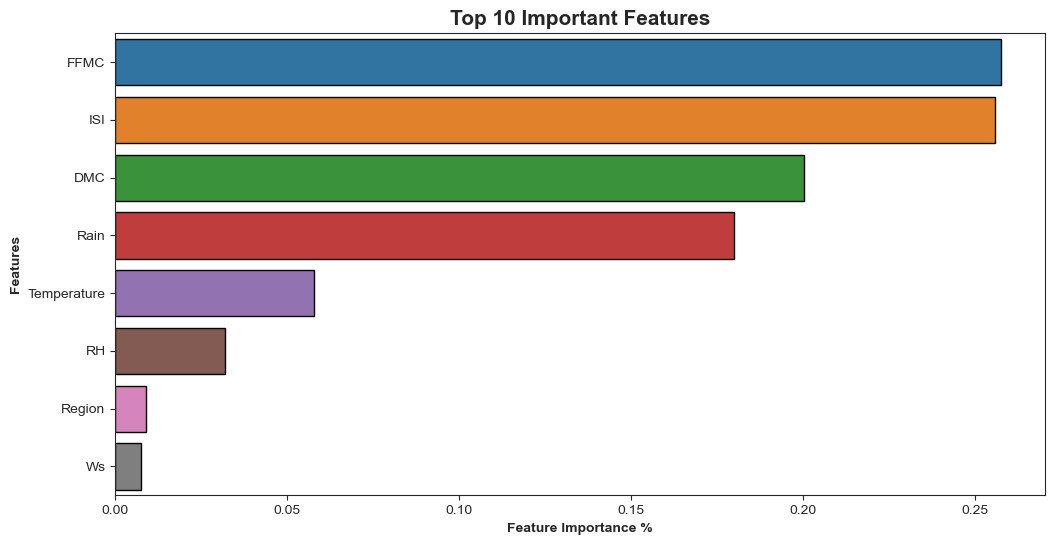

In [82]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.barplot(data=importance_df, x='importance', y='feature', ec='black')
ax.set_title('Top 10 Important Features', weight='bold', fontsize=15)
ax.set_xlabel('Feature Importance %', weight='bold')
ax.set_ylabel('Features', weight = 'bold')

### Model Deployment

In [87]:
Xtrain_new = X_train.drop(['Ws', 'Region','RH'], axis=1)
Xtest_new = X_test.drop(['Ws', 'Region','RH'], axis=1)
Xtrain_new.shape, Xtest_new.shape

((170, 5), (73, 5))

In [88]:
# Ensure both datasets have the same features
common_features = Xtrain_new.columns.intersection(Xtest_new.columns)
Xtrain_new = Xtrain_new[common_features]
Xtest_new = Xtest_new[common_features]

# Apply StandardScaler
scaler = StandardScaler()
Xtrain_new_scaled = scaler.fit_transform(Xtrain_new)
Xtest_new_scaled = scaler.transform(Xtest_new)

In [89]:
xgb_model =Random_xgb.fit(Xtrain_new_scaled, y_train).best_estimator_
xgb_model.score(Xtest_new_scaled, y_test)
xgb_model_pred = xgb_model.predict(Xtest_new_scaled)
cr = classification_report(y_test, xgb_model_pred)
print("Final Model XGB")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Final Model XGB
Accuracy Score value: 0.9726
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        25
           1       1.00      0.94      0.97        48

    accuracy                           0.96        73
   macro avg       0.95      0.97      0.96        73
weighted avg       0.96      0.96      0.96        73



In [90]:
final_df =df.drop(['BUI','DC','Rain', 'Region','RH'],axis=1)


from pymongo import MongoClient
# Establish a connection to a MongoDB Atlas Cluster with Secured Authentication using User Name and Password of the Database
client = MongoClient("mongodb://localhost:27017/y")
# Create Database and specify name of database
db = client.get_database('FireDataML')
# Create a collection
records = db.ml_task

data = final_df.to_dict(orient = 'records')
db.ml_task.insert_many(data)

InsertManyResult([ObjectId('67a660d1f4dff5989ebaa0f2'), ObjectId('67a660d1f4dff5989ebaa0f3'), ObjectId('67a660d1f4dff5989ebaa0f4'), ObjectId('67a660d1f4dff5989ebaa0f5'), ObjectId('67a660d1f4dff5989ebaa0f6'), ObjectId('67a660d1f4dff5989ebaa0f7'), ObjectId('67a660d1f4dff5989ebaa0f8'), ObjectId('67a660d1f4dff5989ebaa0f9'), ObjectId('67a660d1f4dff5989ebaa0fa'), ObjectId('67a660d1f4dff5989ebaa0fb'), ObjectId('67a660d1f4dff5989ebaa0fc'), ObjectId('67a660d1f4dff5989ebaa0fd'), ObjectId('67a660d1f4dff5989ebaa0fe'), ObjectId('67a660d1f4dff5989ebaa0ff'), ObjectId('67a660d1f4dff5989ebaa100'), ObjectId('67a660d1f4dff5989ebaa101'), ObjectId('67a660d1f4dff5989ebaa102'), ObjectId('67a660d1f4dff5989ebaa103'), ObjectId('67a660d1f4dff5989ebaa104'), ObjectId('67a660d1f4dff5989ebaa105'), ObjectId('67a660d1f4dff5989ebaa106'), ObjectId('67a660d1f4dff5989ebaa107'), ObjectId('67a660d1f4dff5989ebaa108'), ObjectId('67a660d1f4dff5989ebaa109'), ObjectId('67a660d1f4dff5989ebaa10a'), ObjectId('67a660d1f4dff5989ebaa1

In [91]:
final_df

,Temperature,Ws,FFMC,DMC,ISI,FWI,Classes
0,29,18,65.7,3.4,1.3,0.5,0
1,29,13,64.4,4.1,1.0,0.4,0
2,26,22,47.1,2.5,0.3,0.1,0
3,25,13,28.6,1.3,0.0,0.0,0
4,27,16,64.8,3.0,1.2,0.5,0
...,...,...,...,...,...,...,...
238,30,14,85.4,16.0,4.5,6.5,1
239,28,15,41.1,6.5,0.1,0.0,0
240,27,29,45.9,3.5,0.4,0.2,0
241,24,18,79.7,4.3,1.7,0.7,0
